In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_csv('https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv', sep = ',')
df = pd.read_csv('covid-data.csv')
df.head()

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [3]:
df.tail()

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
57389,57389,NaN,NaN,International,13/11/20,696.0,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57390,57390,NaN,NaN,International,14/11/20,696.0,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57391,57391,NaN,NaN,International,15/11/20,696.0,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57392,57392,NaN,NaN,International,16/11/20,696.0,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57393,57393,NaN,NaN,International,17/11/20,696.0,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(57394, 50)

In [5]:
df.columns

Index(['Unnamed: 0', 'iso_code', 'continent', 'location', 'date',
       'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardi

In [6]:
df.describe()

,Unnamed: 0,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,57394.000000,5.375800e+04,56465.000000,55652.000000,4.436800e+04,56465.000000,55652.000000,53471.000000,56401.000000,55587.000000,...,50367.000000,33571.000000,51013.000000,52881.000000,39669.000000,39156.000000,24176.000000,45936.000000,56336.000000,49247.000000
mean,28696.500000,1.677974e+05,1953.576941,1920.431953,6.858639e+03,47.054317,46.835439,3139.099982,39.344804,38.403211,...,20620.172071,12.435453,252.646642,8.070269,10.741569,32.642686,52.089636,3.089724,73.937780,0.722223
std,16568.365012,1.693038e+06,18269.650340,17777.391785,5.578081e+04,390.853776,378.272794,6183.455260,133.985155,101.649441,...,20310.999832,19.427924,117.522344,4.189605,10.470743,13.453566,31.645306,2.513193,7.397016,0.153261
min,0.000000,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,14348.250000,1.800000e+02,0.000000,0.857000,1.300000e+01,0.000000,0.000000,90.033000,0.000000,0.260000,...,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,28696.500000,2.070000e+03,14.000000,19.429000,8.400000e+01,0.000000,0.286000,593.663000,2.194000,3.863000,...,13913.839000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.345000,0.752000
75%,43044.750000,2.235675e+04,235.000000,245.286000,7.270000e+02,4.000000,4.000000,3487.050000,25.941000,29.678500,...,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,57393.000000,5.515465e+07,646281.000000,584981.857000,1.328537e+06,10600.000000,9027.714000,76541.772000,8652.658000,2472.188000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          57394 non-null  int64  
 1   iso_code                            57071 non-null  object 
 2   continent                           56748 non-null  object 
 3   location                            57394 non-null  object 
 4   date                                57394 non-null  object 
 5   total_cases                         53758 non-null  float64
 6   new_cases                           56465 non-null  float64
 7   new_cases_smoothed                  55652 non-null  float64
 8   total_deaths                        44368 non-null  float64
 9   new_deaths                          56465 non-null  float64
 10  new_deaths_smoothed                 55652 non-null  float64
 11  total_cases_per_million             53471

In [8]:
df['location'].nunique()   # count of unique value in Location

216

In [9]:
df['continent'].value_counts()

Europe           14828
Africa           13637
Asia             13528
North America     9116
South America     3404
Oceania           2235
Name: continent, dtype: int64

In [10]:
df['total_cases'].mean()

167797.3688753302

In [11]:
df['total_cases'].max()

55154651.0

In [12]:
df['total_deaths'].describe()

count    4.436800e+04
mean     6.858639e+03
std      5.578081e+04
min      1.000000e+00
25%      1.300000e+01
50%      8.400000e+01
75%      7.270000e+02
max      1.328537e+06
Name: total_deaths, dtype: float64

In [13]:
df['human_development_index'].max()

0.953

In [14]:
df.groupby('continent').agg({"human_development_index":"max"})   # max human_development_index, Europe 0.953

,human_development_index
continent,
Africa,0.797
Asia,0.933
Europe,0.953
North America,0.926
Oceania,0.939
South America,0.843


In [15]:
df.groupby('continent').agg({"gdp_per_capita":"min"})   # min gdp_per_capita, Africa 661.240

,gdp_per_capita
continent,
Africa,661.240
Asia,1479.147
Europe,5189.972
North America,1653.173
Oceania,2205.923
South America,6885.829


In [16]:
# Filter dataframe
new_df = df[['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index']]

In [17]:
new_df.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498


In [18]:
new_df.shape

(57394, 7)

In [19]:
new_df=new_df.drop_duplicates()

In [20]:
new_df.isnull().sum()

continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64

In [21]:
new_df.shape

(57394, 7)

In [22]:
new_df=new_df.dropna(subset = ['continent'])

In [23]:
new_df.shape

(56748, 7)

In [24]:
new_df.fillna(0, inplace = True)

In [25]:
new_df.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,01/01/20,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,02/01/20,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,03/01/20,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,04/01/20,0.0,0.0,1803.987,0.498


In [26]:
new_df['date']=pd.to_datetime(new_df['date'])

In [27]:
new_df.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498


In [28]:
new_df['months'] = pd.DatetimeIndex(new_df['date']).month

In [29]:
new_df.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,months
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498,12
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498,1
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498,2
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498,3
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498,4


In [30]:
df_groupby=df.groupby("continent").max()

In [31]:
df_groupby.head()

,Unnamed: 0,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
continent,,,,,,,,,,,,,,,,,,,,,
Africa,56747,ZWE,Zimbabwe,31/12/19,752269.0,13944.0,12583.714,20314.0,572.0,297.429,...,26382.287,77.6,525.432,22.02,9.7,65.8,89.827,6.30,76.88,0.797
Asia,56261,YEM,Yemen,31/12/19,8874290.0,97894.0,93198.571,130519.0,2003.0,1168.000,...,116935.600,30.3,724.417,17.72,26.9,78.1,98.999,13.05,84.86,0.933
Europe,55230,VAT,Vatican,31/12/19,1991233.0,86852.0,54868.571,52147.0,2004.0,1101.000,...,94277.965,5.7,539.849,10.08,44.0,58.3,97.719,13.80,86.75,0.953
North America,54477,VIR,United States Virgin Islands,31/12/19,11205486.0,184813.0,156419.143,247220.0,4928.0,2715.143,...,54225.446,23.5,430.548,17.11,19.1,53.3,90.650,5.80,83.92,0.926
Oceania,55833,WLF,Wallis and Futuna,31/12/19,27750.0,1384.0,551.714,907.0,59.0,22.000,...,44648.710,25.1,561.494,30.53,23.5,48.8,82.502,3.84,83.44,0.939


In [32]:
df_groupby.reset_index(inplace=True)

In [33]:
df_groupby['total_deaths_to_total_cases'] = df_groupby['total_deaths']/df_groupby['total_cases']

In [34]:
df_groupby.head()

,continent,Unnamed: 0,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,total_deaths_to_total_cases
0,Africa,56747,ZWE,Zimbabwe,31/12/19,752269.0,13944.0,12583.714,20314.0,572.0,...,77.6,525.432,22.02,9.7,65.8,89.827,6.30,76.88,0.797,0.027004
1,Asia,56261,YEM,Yemen,31/12/19,8874290.0,97894.0,93198.571,130519.0,2003.0,...,30.3,724.417,17.72,26.9,78.1,98.999,13.05,84.86,0.933,0.014708
2,Europe,55230,VAT,Vatican,31/12/19,1991233.0,86852.0,54868.571,52147.0,2004.0,...,5.7,539.849,10.08,44.0,58.3,97.719,13.80,86.75,0.953,0.026188
3,North America,54477,VIR,United States Virgin Islands,31/12/19,11205486.0,184813.0,156419.143,247220.0,4928.0,...,23.5,430.548,17.11,19.1,53.3,90.650,5.80,83.92,0.926,0.022062
4,Oceania,55833,WLF,Wallis and Futuna,31/12/19,27750.0,1384.0,551.714,907.0,59.0,...,25.1,561.494,30.53,23.5,48.8,82.502,3.84,83.44,0.939,0.032685


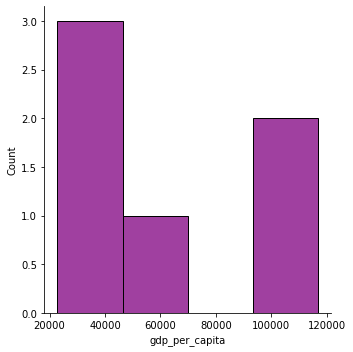

In [35]:
sns.displot(df_groupby['gdp_per_capita'], kde=False, color = 'purple')

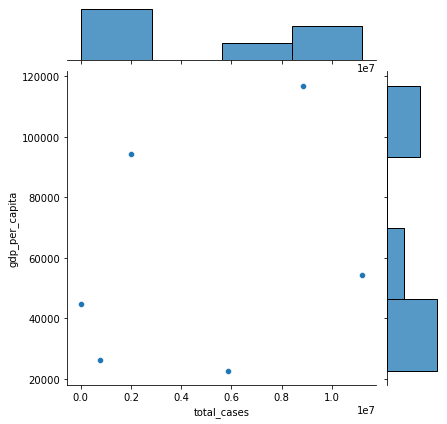

In [36]:
# plt.scatter('total_cases','gdp_per_capita', marker = '*', s = '30', c = 'r' ) or
sns.jointplot(data=df_groupby,x="total_cases",y="gdp_per_capita",kind="scatter")

In [37]:
# sns.pairplot(data=df_groupby)            # Madam this cell is not giving output only showing '*'. So I comment out it.  

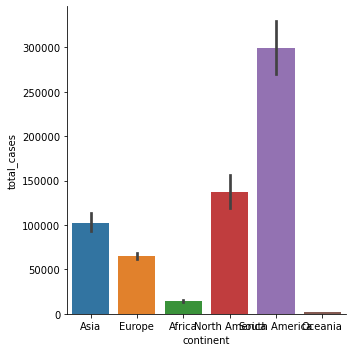

In [38]:
sns.catplot(data=df,x="continent",y="total_cases",kind="bar")